In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

width = int(375)
height = int(256)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 373, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 186, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 184, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 92, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 90, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 45, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 43, 128)       1

In [3]:
from tensorflow.keras import optimizers
import tensorflow as tf

model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
train_dir = 'train'
validation_dir = 'validation'


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(height, width),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(height, width),
        batch_size=20,
        class_mode='binary')

Found 2080 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 256, 375, 3)
labels batch shape:  (20,)


In [6]:
CallBack = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0, 
                                            patience=1, 
                                            verbose=0, 
                                            mode='auto')

history = model.fit_generator(train_generator,
                             steps_per_epoch=104,
                             epochs=10,
                             validation_data=validation_generator,
                             validation_steps=26,
                             verbose=1,
                             callbacks=[CallBack])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
104/104 [==============================] - 246s 2s/step - loss: 0.6636 - accuracy: 0.5808 - val_loss: 0.5592 - val_accuracy: 0.7115
Epoch 2/10
104/104 [==============================] - 241s 2s/step - loss: 0.3635 - accuracy: 0.8495 - val_loss: 0.1619 - val_accuracy: 0.9788
Epoch 3/10
104/104 [==============================] - 241s 2s/step - loss: 0.1130 - accuracy: 0.9692 - val_loss: 0.0605 - val_accuracy: 0.9942
Epoch 4/10
104/104 [==============================] - 242s 2s/step - loss: 0.0757 - accuracy: 0.9760 - val_loss: 0.0946 - val_accuracy: 0.9731


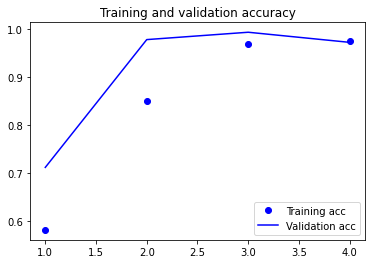

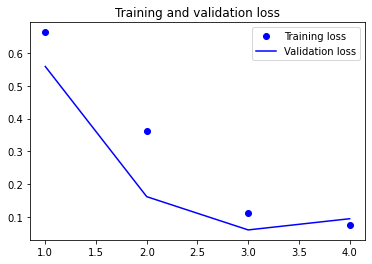

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
# model.save('circle_needles_SIMPLE.h5')